<a href="https://colab.research.google.com/github/Ekjot786/python/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD TASKING


In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv("netflix_titles.csv")
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [ ]:
df.shape

(8807, 13)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')

In [ ]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object


2

In [ ]:
print("Missing Values\n", df.isnull().sum())

Missing Values
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['duration'].fillna('0 min', inplace=True)

print("\nMissing Values after handling:\n", df.isnull().sum())


Missing Values after handling:
 show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64


/tmp/ipython-input-16-1796130269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-16-1796130269.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
df['year_added'] = df['date_added'].dt.year
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


3

In [ ]:
df['type'].value_counts()

# Top 5 countries by content count (excluding NaNs)
df['country'].dropna().value_counts().head(5)

# common genres (excluding NaNs)
df['listed_in'].dropna().value_counts().head(5)

# Year with the highest content added (excluding NaNs)
df['year_added'].dropna().value_counts().idxmax()

# Total content added each year (sorted)
df['year_added'].dropna().value_counts().sort_index()

,count
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,11
2014.0,24
2015.0,82
2016.0,429


4

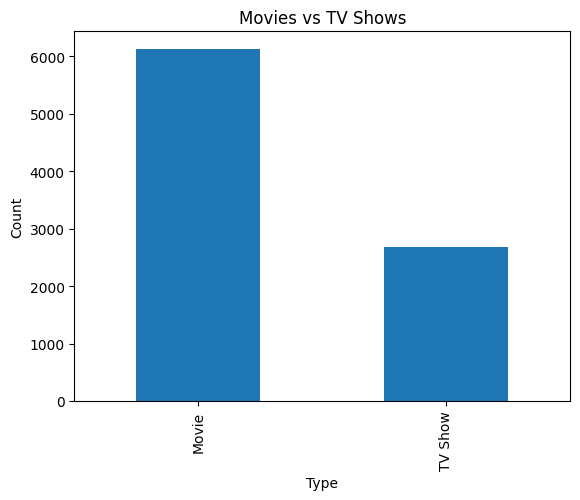

In [ ]:
import matplotlib.pyplot as plt

# Bar chart: Movies vs TV Shows
df['type'].value_counts().plot(kind='bar')
plt.title('Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

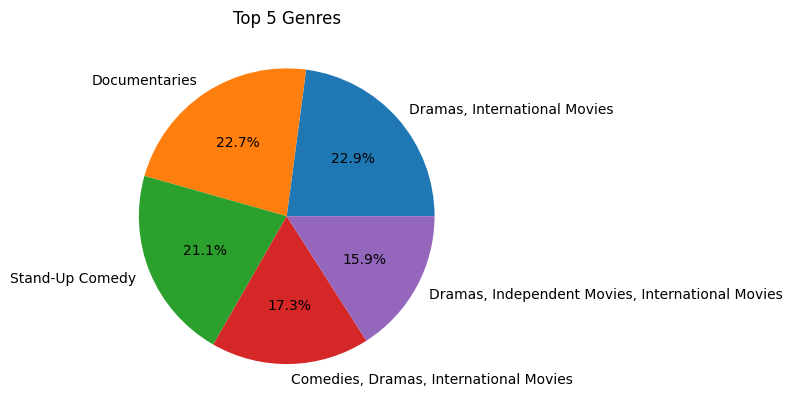

In [ ]:
# Pie chart: Distribution of top 5 genres
df['listed_in'].dropna().value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Genres')
plt.ylabel('')
plt.show()

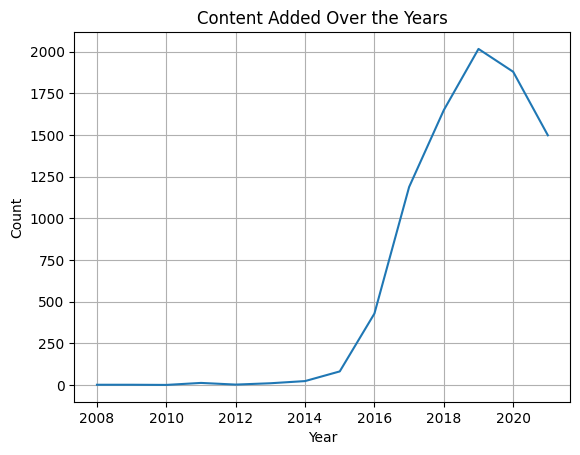

In [ ]:
# Line graph: Content added over the years
df['year_added'].dropna().value_counts().sort_index().plot(kind='line')
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

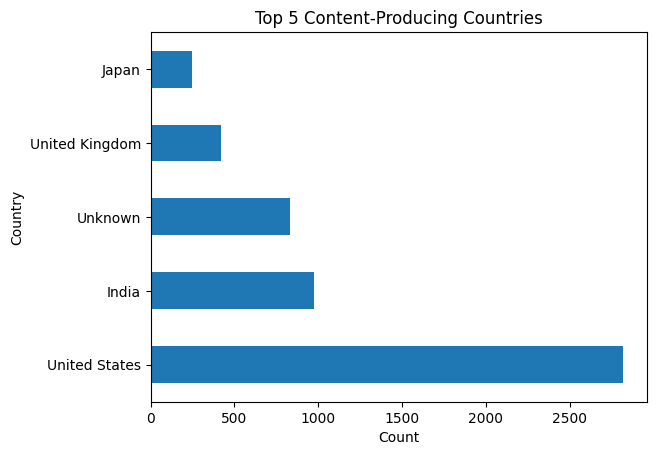

In [ ]:
# Horizontal bar chart: Top 5 content-producing countries
df['country'].dropna().value_counts().head(5).plot(kind='barh')
plt.title('Top 5 Content-Producing Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()